In [ ]:
【例16.1】已知鸢尾花数据是4维的，共三类样本，按照上文中PCA的实现步骤对鸢尾花数据进行降维，实现在二维平面上的可视化。

In [ ]:
1.读取数据，并且设定第一行名称

In [2]:
import numpy as np
import pandas as pd
df = pd.read_csv('iris.csv')
df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
df.head()  # 前5行数据如图16-3所示

,sepal_len,sepal_wid,petal_len,petal_wid,class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
2.将数据集分为数据类X和类别类y

In [3]:
X = df.iloc[:,0:4].values
y = df.iloc[:,4].values

In [ ]:
3.将X的每一列（代表一个属性字段）进行零均值化

In [4]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)  

In [ ]:
4.求取X的协方差矩阵

In [5]:
# 方法一：numpy求取协方差的函数cov
print('numpy covariance matrix: \n%s' %np.cov(X_std.T))  # 求X的协方差矩阵

numpy covariance matrix: 
[[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


In [7]:
# 方法二：按照定义
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


In [ ]:
5.求取协方差矩阵的特征向量和特征值

In [8]:
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]

Eigenvalues 
[2.93808505 0.9201649  0.14774182 0.02085386]


In [ ]:
6.特征值和特征向量由高到低排序

In [9]:
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
print (eig_pairs)
print ('----------')
eig_pairs.sort(key=lambda x: x[0], reverse=True)
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

[(2.9380850501999953, array([ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654])), (0.9201649041624846, array([-0.37741762, -0.92329566, -0.02449161, -0.06694199])), (0.1477418210449476, array([-0.71956635,  0.24438178,  0.14212637,  0.63427274])), (0.02085386217646298, array([ 0.26128628, -0.12350962, -0.80144925,  0.52359713]))]
----------
Eigenvalues in descending order:
2.9380850501999953
0.9201649041624846
0.1477418210449476
0.02085386217646298


In [ ]:
7.取特征值最大的前2个特征向量，组成转换基P=4×2维

In [10]:
P=np.hstack((eig_pairs[0][1].reshape(4,1),
                      eig_pairs[1][1].reshape(4,1)))
print('Matrix P:\n', P)

Matrix P:
 [[ 0.52106591 -0.37741762]
 [-0.26934744 -0.92329566]
 [ 0.5804131  -0.02449161]
 [ 0.56485654 -0.06694199]]


In [ ]:
8.验证结果

In [ ]:
(1)降维后矩阵Y=XP

In [12]:
Y = X_std.dot(P)
Y

array([[-2.26470281, -0.4800266 ],
       [-2.08096115,  0.67413356],
       [-2.36422905,  0.34190802],
       [-2.29938422,  0.59739451],
       [-2.38984217, -0.64683538],
       [-2.07563095, -1.48917752],
       [-2.44402884, -0.0476442 ],
       [-2.23284716, -0.22314807],
       [-2.33464048,  1.11532768],
       [-2.18432817,  0.46901356],
       [-2.1663101 , -1.04369065],
       [-2.32613087, -0.13307834],
       [-2.2184509 ,  0.72867617],
       [-2.6331007 ,  0.96150673],
       [-2.1987406 , -1.86005711],
       [-2.26221453, -2.68628449],
       [-2.2075877 , -1.48360936],
       [-2.19034951, -0.48883832],
       [-1.898572  , -1.40501879],
       [-2.34336905, -1.12784938],
       [-1.914323  , -0.40885571],
       [-2.20701284, -0.92412143],
       [-2.7743447 , -0.45834367],
       [-1.81866953, -0.08555853],
       [-2.22716331, -0.13725446],
       [-1.95184633,  0.62561859],
       [-2.05115137, -0.24216355],
       [-2.16857717, -0.52714953],
       [-2.13956345,

In [ ]:
(2)降维前原始数据的可视化

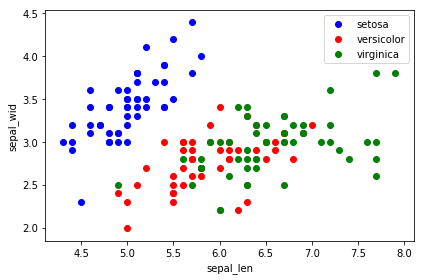

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(6, 4))
for lab, col in zip(('setosa', 'versicolor', 'virginica'),
                        ('blue', 'red', 'green')):
     plt.scatter(X[y==lab, 0],
              X[y==lab, 1],
              label=lab,
              c=col)
plt.xlabel('sepal_len')
plt.ylabel('sepal_wid')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [ ]:
(3)降维后数据的可视化

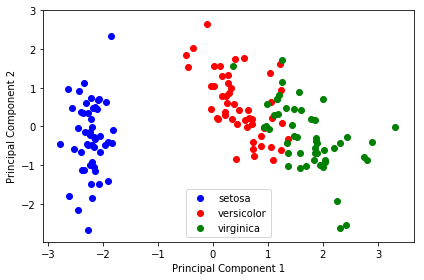

In [14]:
plt.figure(figsize=(6, 4))
for lab, col in zip(('setosa', 'versicolor', 'virginica'),
                        ('blue', 'red', 'green')):
     plt.scatter(Y[y==lab,0],
              Y[y==lab,1],
              label=lab,
              c=col)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='lower center')
plt.tight_layout()
plt.show()

In [ ]:
【例16.2】利用PCA的算法包对鸢尾花数据进行降维，实现在二维平面上的可视化，并提取主成分贡献率。

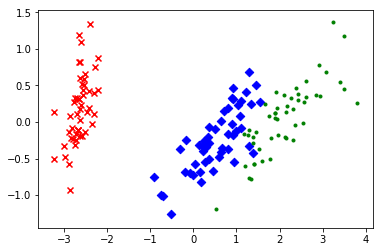

In [15]:
# 加载matplotlib用于数据的可视化
import matplotlib.pyplot as plt
# 加载PCA算法包
from sklearn.decomposition import PCA
# 加载鸢尾花数据
from sklearn.datasets import load_iris
data = load_iris()  # 以字典形式加载数据
y=data.target     # 使用y表示数据集中的标签
x=data.data      # 使用x表示数据集的属性数据
pca=PCA(n_components=2)   # 加载PCA算法，设置降维后的维度为2
reduced_x=pca.fit_transform(x)
# 对原始数据进行降维，保存在reduced_x中
red_x,red_y=[],[]
blue_x,blue_y=[],[]
green_x,green_y=[],[]
# 三类数据点
for i in range(len(reduced_x)):
    if y[i]==0:
        red_x.append(reduced_x[i][0])
        red_y.append(reduced_x[i][1])
    elif y[i]==1:
        blue_x.append(reduced_x[i][0])
        blue_y.append(reduced_x[i][1])
    else:
        green_x.append(reduced_x[i][0])
        green_y.append(reduced_x[i][1])
# 对降维后的数据可视化
plt.scatter(red_x,red_y,c='r',marker='x')
plt.scatter(blue_x,blue_y,c='b',marker='D')
plt.scatter(green_x,green_y,c='g',marker='.')
plt.show()  # 不同标记的散点图如图16-12所示

In [16]:
pca.explained_variance_  # 两个主成分可解释方差大小
pca.explained_variance_ratio_  # 主成分占比

array([0.92461621, 0.05301557])

In [17]:
pca.explained_variance_ratio_.sum() 

0.9776317750248034